In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
train_path = "images/train"
test_path = "images/test"

In [3]:
# def createDataFrame(folder):
#     images_path = []
#     labels = []
#     for label in os.listdir(folder):
#         for image_name in os.listdir(os.path.join(folder,label)):
#             images_path.append(os.path.join(folder,label,image_name))
#             labels.append(label)
#         print("Label", label, "created successfully!")
#     return images_path,labels

In [5]:
def createDataFrame(folder):
    images_path = []
    labels = []
    for label in os.listdir(folder):
        if label != '.DS_Store':  # Skip .DS_Store files
            for image_name in os.listdir(os.path.join(folder, label)):
                images_path.append(os.path.join(folder, label, image_name))
                labels.append(label)
    return images_path, labels


In [6]:
train_df = pd.DataFrame()
train_df['image'], train_df['label'] = createDataFrame(train_path)

In [7]:
train_df.head(5)

,image,label
0,images/train/happy/Training_50449107.jpg,happy
1,images/train/happy/Training_70433018.jpg,happy
2,images/train/happy/Training_85610005.jpg,happy
3,images/train/happy/Training_4460748.jpg,happy
4,images/train/happy/Training_6312930.jpg,happy


In [8]:
test_df = pd.DataFrame()
test_df['image'], test_df['label'] = createDataFrame(test_path)

In [9]:
test_df.head(5)

,image,label
0,images/test/happy/PrivateTest_45699463.jpg,happy
1,images/test/happy/PrivateTest_61855708.jpg,happy
2,images/test/happy/PublicTest_53681781.jpg,happy
3,images/test/happy/PrivateTest_52109800.jpg,happy
4,images/test/happy/PublicTest_41104919.jpg,happy


In [10]:
print(test_df)

                                             image    label
0       images/test/happy/PrivateTest_45699463.jpg    happy
1       images/test/happy/PrivateTest_61855708.jpg    happy
2        images/test/happy/PublicTest_53681781.jpg    happy
3       images/test/happy/PrivateTest_52109800.jpg    happy
4        images/test/happy/PublicTest_41104919.jpg    happy
...                                            ...      ...
7173  images/test/disgust/PrivateTest_79683471.jpg  disgust
7174  images/test/disgust/PrivateTest_34013087.jpg  disgust
7175   images/test/disgust/PublicTest_67559665.jpg  disgust
7176  images/test/disgust/PrivateTest_89077668.jpg  disgust
7177  images/test/disgust/PrivateTest_53395751.jpg  disgust

[7178 rows x 2 columns]


In [11]:
def extractFeatures(images):
    features = []
    for x in tqdm(images):
        y = load_img(x, grayscale =  True )
        y = np.array(y)
        features.append(y)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [12]:
train_features = extractFeatures(train_df['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

/Users/saisanjanapithani/anaconda3/lib/python3.11/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [13]:
test_features = extractFeatures(test_df['image']) 

  0%|          | 0/7178 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_df['label'])

LabelEncoder()

In [19]:
y_train = le.transform(train_df['label'])
y_test = le.transform(test_df['label'])

In [20]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [22]:
import cv2
import numpy as np

# Convert grayscale images to RGB
x_train_rgb = np.repeat(x_train, 3, axis=-1)
x_test_rgb = np.repeat(x_test, 3, axis=-1)

In [23]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical

# Step 1: Load VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Step 2: Modify the model for your classification task
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 3: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(x=x_train_rgb, y=y_train, batch_size=32, epochs=10, validation_split=0.2)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(x=x_test_rgb, y=y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 447s 621ms/step - accuracy: 0.2930 - loss: 1.9631 - val_accuracy: 0.0000e+00 - val_loss: 6.2400
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 504s 702ms/step - accuracy: 0.3116 - loss: 1.5818 - val_accuracy: 0.0000e+00 - val_loss: 8.0197
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 527s 735ms/step - accuracy: 0.3298 - loss: 1.5323 - val_accuracy: 0.0000e+00 - val_loss: 7.7143
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 547s 762ms/step - accuracy: 0.4522 - loss: 1.2916 - val_accuracy: 0.0000e+00 - val_loss: 7.4058
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 536s 746ms/step - accuracy: 0.5202 - loss: 1.1410 - val_accuracy: 0.0549 - val_loss: 8.9673
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 548s 764ms/step - accuracy: 0.5603 - loss: 1.0393 - val_accuracy: 0.0399 - val_loss: 8.9088
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 587s 817ms/step - accuracy: 0.5973 - loss: 0.9764 - val_accuracy: 0.1038 - val_loss: 9.2226
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 594s 828ms/step - ac

In [24]:
model_json1 = model.to_json()
with open("emotiondetectorvgg16.json",'w') as json_file:
    json_file.write(model_json1)
model.save("emotiondetectorvgg16.h5")

In [25]:
from keras.models import model_from_json

In [26]:
json_file = open("emotiondetectorvgg16.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load the model weights into the loaded model
loaded_model.load_weights("emotiondetectorvgg16.h5")

In [27]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [28]:
# def ef(image):
#     img = load_img(image,grayscale =  True )
#     feature = np.array(img)
#     feature = feature.reshape(1,48,48,1)
#     return feature/255.0

In [30]:
def ef(image_path):
    img = load_img(image_path, color_mode='rgb', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 3)  # Reshape to (1, height, width, 3)
    return feature / 255.0


In [31]:
image = 'images/train/sad/Training_120178.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
model prediction is  sad


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  fear


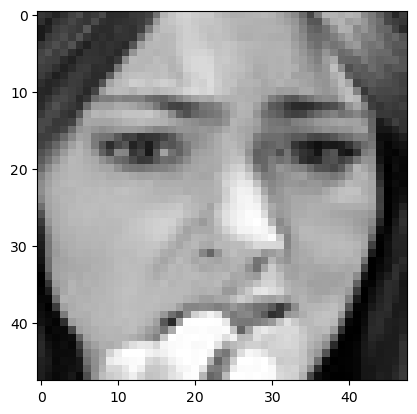

In [34]:
image = 'images/train/fear/Training_303571.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
model prediction is  sad


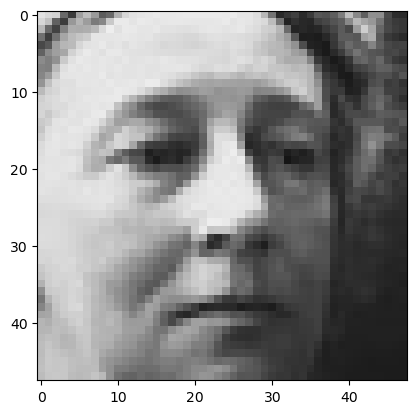

In [35]:
image = 'images/train/sad/Training_2913.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is  fear


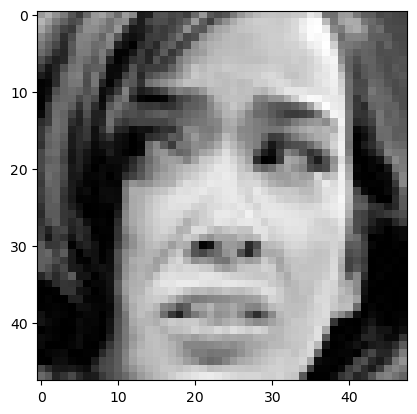

In [36]:
image = 'images/train/disgust/Training_659019.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is  happy


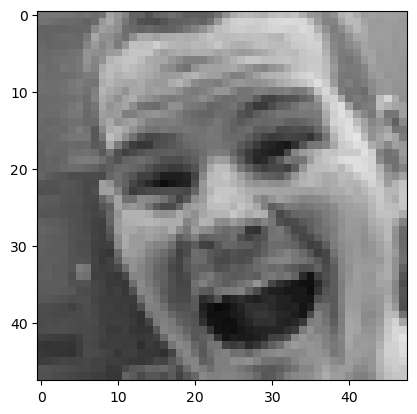

In [37]:
image = 'images/train/happy/Training_11204.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is  surprise


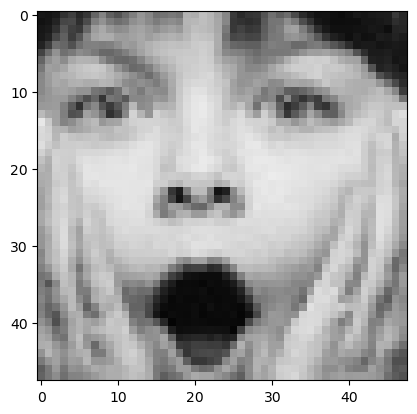

In [38]:
image = 'images/train/surprise/Training_238687.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is  fear


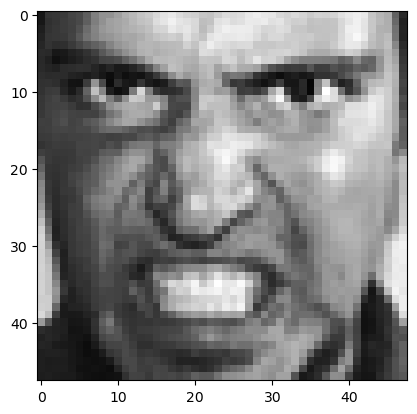

In [39]:
image = 'images/train/angry/Training_992349.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48,3),cmap='gray')